<h1>EDyA: KNN con heaps</h1>

<h3>Heap</h3>

In [2082]:
class Heap:
    def __init__(self):
        self.heap = [(0,'dum')] #lista de [ (  4.242640687119285  ,   ((1, 2), 'A')   ) , (1.4142135623730951, ((5, 6), 'B')) ...] 
        self.size = 0
        
    #/////----- INSERT OPERATION -----/////
    def arrange(self, k):
        #print("======arrange K ==", k)
        while k // 2 > 0:
            if self.heap[k][0] < self.heap[k//2][0]:
                self.heap[k], self.heap[k//2] = self.heap[k//2], self.heap[k]
            k //= 2
    

    def insert(self, item):   # distancias,  [(4.242640687119285, ((1, 2), 'A')), (1.4142135623730951, ((5, 6), 'B')) ...]
        self.heap.append(item)
        self.size += 1
        self.arrange(self.size)
    
    #/////----- POP OPERATION -----/////
    def minindex(self, k):
        if k * 2 + 1 > self.size:
            return k * 2
        elif self.heap[k*2][0] < self.heap[k*2+1][0]:
            return k * 2
        else:
            return k * 2 + 1
    
    def sink(self, k):
        while k*2 <= self.size:
            mi = self.minindex(k)
            if self.heap[k][0] > self.heap[mi][0]:
                self.heap[k], self.heap[mi] = self.heap[mi], self.heap[k]
            k = mi

    def pop(self):
        item = self.heap[1]
        self.heap[1] = self.heap[self.size]
        self.size -= 1
        self.heap.pop()
        self.sink(1)
        return item
    
    def heap_sort(self):
        sorted_list = []
        for node in range(self.size):
            n = self.pop()
            sorted_list.append(n)
        return sorted_list

<h3>datillos</h3>

In [2083]:
# Datos de prueba con etiquetas de clase
puntos = [((1, 2), 'A'), ((5, 7), 'B'), ((3, 3), 'A'), ((9, 8), 'B'), ((2, 7), 'A'), ((6, 5), 'B'), ((6, 4), 'B'), ((3, 6), 'A')]

# Punto de prueba
punto_prueba = (4, 5)


#DISTANCIAS = [ (4, ((1, 2), 'A')) , (1, ((5, 6), 'B')), (7, ((3, 4), 'A')), (2, ((3, 4), 'A')) ] 

In [2084]:
from matplotlib import pyplot as plt 
import math
import numpy as np
from collections import Counter

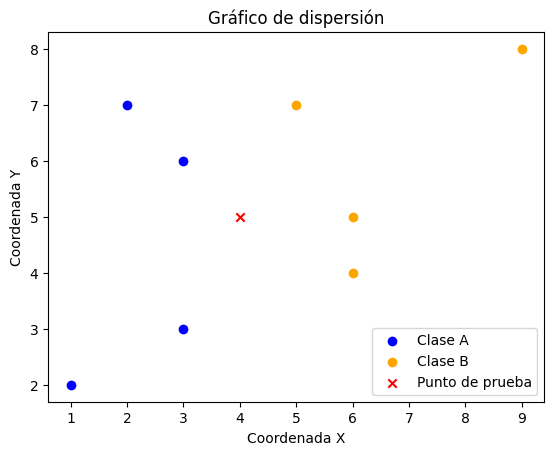

In [2085]:
# Extraer coordenadas y etiquetas de clase
coordenadas, etiquetas = zip(*puntos)
coordenadas_x, coordenadas_y = zip(*coordenadas)

# Crear un gráfico de dispersión para cada clase
plt.scatter(np.array(coordenadas_x)[np.array(etiquetas) == 'A'], np.array(coordenadas_y)[np.array(etiquetas) == 'A'], c='blue', marker='o', label='Clase A')
plt.scatter(np.array(coordenadas_x)[np.array(etiquetas) == 'B'], np.array(coordenadas_y)[np.array(etiquetas) == 'B'], c='orange', marker='o', label='Clase B')
plt.scatter(*punto_prueba, color='red', marker='x', label='Punto de prueba')

# Etiquetas y leyenda
plt.title('Gráfico de dispersión')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()

# Mostrar el gráfico
plt.show()

<h1>KNN</h1>

In [2086]:
# Función para calcular la distancia euclidiana entre dos puntos (x, y)
def calcular_distancia(punto1, punto2):
    dist = math.sqrt((punto1[0] - punto2[0])**2 + (punto1[1] - punto2[1])**2)
    return dist

In [2087]:
# Función para encontrar los k vecinos más cercanos a un punto en una lista de puntos
def k_vecinos_mas_cercanos(punto, lista_puntos, k):
    distancias = [(calcular_distancia(punto, vecino[0]), vecino) for vecino in lista_puntos]
    h = Heap()
    for vecino in distancias: 
        h.insert(vecino)
        
    k_vecinos = h.heap_sort()[:k]

    return k_vecinos

In [2088]:
k_vecinos_mas_cercanos(punto_prueba, puntos, 3)

[(1.4142135623730951, ((3, 6), 'A')),
 (2.0, ((6, 5), 'B')),
 (2.23606797749979, ((6, 4), 'B'))]

In [2089]:
ayuda = [(1.4142135623730951, ((5, 6), 'B')),
 (1.4142135623730951, ((3, 4), 'A')),
 (2.8284271247461903, ((2, 7), 'A'))]

ayuda[0][1][1]

'B'

In [2090]:
clases_vecinos_ayuda = [clase[1][1] for clase in ayuda]
clases_vecinos_ayuda

['B', 'A', 'A']

<h3>funcion predecir clase</h3>

In [2091]:
# Función para predecir la clase de un punto basándose en los k vecinos más cercanos
def predecir_clase(punto, lista_puntos, k):
    vecinos_cercanos = k_vecinos_mas_cercanos(punto, lista_puntos, k)
    clases_vecinos = [clase[1][1] for clase in vecinos_cercanos]
    counter = Counter(clases_vecinos)
    clase_predicha = counter.most_common(2)[0][0]
    return clase_predicha

<h2>probamos</h2>

In [2092]:
# Hiperparámetro k (número de vecinos más cercanos a considerar)
k = 1

# Predicción de la clase del punto de prueba
clase_predicha = predecir_clase(punto_prueba, puntos, k)

clase_predicha

'A'

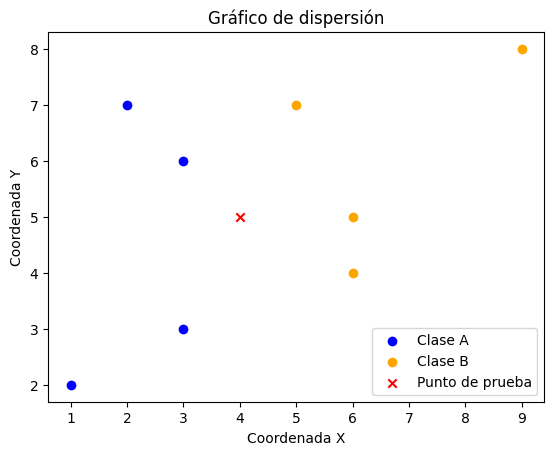

In [2093]:
# Crear un gráfico de dispersión para cada clase
plt.scatter(np.array(coordenadas_x)[np.array(etiquetas) == 'A'], np.array(coordenadas_y)[np.array(etiquetas) == 'A'], c='blue', marker='o', label='Clase A')
plt.scatter(np.array(coordenadas_x)[np.array(etiquetas) == 'B'], np.array(coordenadas_y)[np.array(etiquetas) == 'B'], c='orange', marker='o', label='Clase B')
plt.scatter(*punto_prueba, color='red', marker='x', label='Punto de prueba')

# Etiquetas y leyenda
plt.title('Gráfico de dispersión')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()

# Mostrar el gráfico
plt.show()